In [5]:
import numpy 

from typing import Any, Tuple

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import pathlib
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow_text import normalize_utf8
from tensorflow import keras
from keras import layers as L
from keras import models as M
from keras import losses as LL

2023-01-03 23:36:01.530859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-03 23:36:01.752815: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-03 23:36:01.752848: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-03 23:36:03.224727: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [6]:
# Download the file
# http://www.manythings.org/anki/
path_to_file = pathlib.Path().home() / "tensorflow_datasets" / "anki" / "ita-eng" / "ita.txt"

df = pd.read_csv(path_to_file, sep="\t", header=None)
df.columns=["eng", "ita", "author"]
df["split"] = np.where(np.random.uniform(size=(len(df),)) < 0.8, "train", "val")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358373 entries, 0 to 358372
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   eng     358373 non-null  object
 1   ita     358373 non-null  object
 2   author  358373 non-null  object
 3   split   358373 non-null  object
dtypes: object(4)
memory usage: 10.9+ MB


In [8]:
df.head(10)

,eng,ita,author,split
0,Hi.,Ciao!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,train
1,Hi.,Ciao.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,train
2,Run!,Corri!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,train
3,Run!,Corra!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,train
4,Run!,Correte!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...,val
5,Who?,Chi?,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,train
6,Wow!,Wow!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...,train
7,Duck!,Amore!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,train
8,Duck!,Tesoro!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,train
9,Duck!,Immergiti!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...,val


In [9]:
BUFFER_SIZE = len(df)
BATCH_SIZE = 64

In [10]:
train_raw = (
    tf.data.Dataset
    .from_tensor_slices((
        df.query("split == 'train'")["ita"].values,
        df.query("split == 'train'")["eng"].values,
    ))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
)

val_raw = (
    tf.data.Dataset
    .from_tensor_slices((
        df.query("split == 'val'")["ita"].values,
        df.query("split == 'val'")["eng"].values,
    ))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
)

2023-01-03 23:36:07.553057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-03 23:36:07.553113: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-03 23:36:07.553151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (calcifer-Inspiron-7370): /proc/driver/nvidia/version does not exist
2023-01-03 23:36:07.553731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
for ita, eng in train_raw.shuffle(100).take(1):
    print("ITA:", ita, "ENG:", eng, "\n")

ITA: tf.Tensor(
[b'\xc3\x88 quello che mi ha aiutato.'
 b'La riunione non durer\xc3\xa0 cos\xc3\xac tanto.'
 b'Questo cappello mi \xc3\xa8 costato 10 dollari.'
 b'Tom avrebbe dovuto dire di s\xc3\xac.' b'Tom andr\xc3\xa0.'
 b"Perch\xc3\xa9 non andate a dormire un po'?"
 b'Tom inizi\xc3\xb2 a leggere.' b'Oggi mi sento bene.'
 b'\xc3\x88 nata qua?' b'\xc3\x88 una donna ora.'
 b'Voi siete favorevoli o contrarie alla guerra?'
 b'Penso che Tom la amer\xc3\xa0.' b'Sono state fatte delle telefonate.'
 b'Tom sta giocando a carte con Mary.' b'Odio vederti cos\xc3\xac.'
 b'Tu hai un cronometro?' b'Non posso essere sicuro.'
 b'Finch\xc3\xa9 viviamo, dobbiamo lavorare.'
 b'Le nostre bambine vanno ancora a scuola.' b'Tu sei con qualcuno?'
 b'Quanto cibo rimane?'
 b'Io penso che sia improbabile che qualsiasi negozio venderebbe questo modello a quel prezzo.'
 b'Che shampoo utilizzate?' b'Quando arriverai a casa?'
 b'Ti ho lasciato un messaggio.' b'Hai della posta.'
 b'Si spos\xc3\xb2 due volte ed ebb

In [12]:
@tf.function
def clean_string(s):
    # Split accented characters
    text = normalize_utf8(s, "NFKD")
    text = tf.strings.lower(text)
    # Keep space, a to z, and select punctuation.
    text = tf.strings.regex_replace(text, '[^ a-z.?!,;]', '')
    # Add spaces around punctuation.
    text = tf.strings.regex_replace(text, '[.?!,;]', r' \0 ')
    # Strip whitespace.
    text = tf.strings.strip(text)
    # Add START and END tokens
    text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
    return text

In [13]:
ita_sample = tf.constant("ciao sono marco. COme ti chiami?")
clean_string(ita_sample)

<tf.Tensor: shape=(), dtype=string, numpy=b'[START] ciao sono marco .  come ti chiami ? [END]'>

In [14]:
VOCB_SIZE = 30000

vectorizer_src = L.TextVectorization(
    max_tokens=VOCB_SIZE,
    standardize=clean_string,
    ragged=True,
    encoding='utf-8',
)
vectorizer_src.adapt(train_raw.map(lambda src, dst: src))

vectorizer_dst = L.TextVectorization(
    max_tokens=VOCB_SIZE,
    standardize=clean_string,
    ragged=True,
    encoding='utf-8',
)

vectorizer_dst.adapt(train_raw.map(lambda src, dst: dst))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [15]:
vectorizer_dst.get_vocabulary()[:10]

['', '[UNK]', '[START]', '[END]', '.', 'tom', 'you', 'i', 'to', '?']

In [16]:
vectorizer_src([ita_sample])

<tf.RaggedTensor [[2, 4090, 17, 1, 4, 47, 72, 1277, 6, 3]]>

In [17]:
def prep_dataset(src, dst):
    src_enc = vectorizer_src(src).to_tensor()
    dst_enc = vectorizer_dst(dst)
    dst_in = dst_enc[:, :-1].to_tensor()
    dst_out = dst_enc[:, 1:].to_tensor()
    return (src_enc, dst_in), dst_out

In [18]:
ds_train = train_raw.map(prep_dataset, tf.data.AUTOTUNE)
ds_val = val_raw.map(prep_dataset, tf.data.AUTOTUNE)

In [19]:
for (src_enc_sample, dst_in_enc_sample), dst_out_enc_sample in ds_val.take(1):
    print(src_enc_sample[0].numpy())
    print(dst_in_enc_sample[0].numpy())
    print(dst_out_enc_sample[0].numpy())

[   2   80  873   91 1793  370    4    3    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[   2   29 1067  219  757    4    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[  29 1067  219  757    4    3    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


## Display utils

In [20]:
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(5, 5), cmap='Reds'):
    """Show heatmaps of matrices."""
    num_rows, num_cols, _, _ = matrices.shape
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

tf.Tensor(
[[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]], shape=(1, 1, 10, 10), dtype=float32)


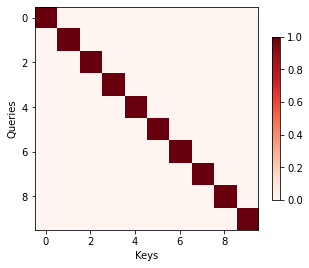

In [21]:
attention_weights = tf.reshape(tf.eye(10), (1, 1, 10, 10))
print(attention_weights)

show_heatmaps(attention_weights, xlabel="Keys", ylabel="Queries")

## Utils

In [22]:
def masked_softmax(X, valid_lens):  #@save
    """Perform softmax operation by masking elements on the last axis."""
    # X: 3D tensor, valid_lens: 1D or 2D tensor
    def _sequence_mask(X, valid_len, value=0):
        maxlen = X.shape[1]
        mask = tf.range(start=0, limit=maxlen, dtype=tf.float32)[
            None, :] < tf.cast(valid_len[:, None], dtype=tf.float32)

        if len(X.shape) == 3:
            return tf.where(tf.expand_dims(mask, axis=-1), X, value)
        else:
            return tf.where(mask, X, value)

    if valid_lens is None:
        return tf.nn.softmax(X, axis=-1)
    else:
        shape = X.shape
        if len(valid_lens.shape) == 1:
            valid_lens = tf.repeat(valid_lens, repeats=shape[1])

        else:
            valid_lens = tf.reshape(valid_lens, shape=-1)
        # On the last axis, replace masked elements with a very large negative
        # value, whose exponentiation outputs 0
        X = _sequence_mask(tf.reshape(X, shape=(-1, shape[-1])), valid_lens,
                           value=-1e6)
        return tf.nn.softmax(tf.reshape(X, shape=shape), axis=-1)

In [23]:
inputs = tf.random.uniform(shape=(2, 2, 4))  # batch, d1 x d2
print(inputs)

tf.Tensor(
[[[0.80791485 0.61488914 0.34532285 0.05979419]
  [0.89229083 0.96587384 0.51980937 0.23290789]]

 [[0.82018805 0.11638951 0.39705026 0.5180155 ]
  [0.6533445  0.8658799  0.86903846 0.39571452]]], shape=(2, 2, 4), dtype=float32)


In [24]:
tf.math.reduce_sum(tf.nn.softmax(inputs, axis=-1), axis=1)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.64624524, 0.6095421 , 0.42499542, 0.31921726],
       [0.5814235 , 0.46222824, 0.51863205, 0.4377161 ]], dtype=float32)>

## Model definition

In [25]:
RNN_UNITS = 128

In [26]:
class ShapeChecker():
    def __init__(self):
    # Keep a cache of every axis-name seen
        self.shapes = {}

    def __call__(self, tensor, names, broadcast=False):
        if not tf.executing_eagerly():
            return

        parsed = einops.parse_shape(tensor, names)

        for name, new_dim in parsed.items():
            old_dim = self.shapes.get(name, None)

            if (broadcast and new_dim == 1):
                continue

            if old_dim is None:
                # If the axis name is new, add its length to the cache.
                self.shapes[name] = new_dim
                continue

            if new_dim != old_dim:
                raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                                 f"    found: {new_dim}\n"
                                 f"    expected: {old_dim}\n")

### Encoder

In [109]:
class Encoder(M.Model):
    
    def __init__(self, vectorizer: L.TextVectorization, units: int):
        super(Encoder, self).__init__()
        self.vectorizer = vectorizer
        self.vocab_size = self.vectorizer.vocabulary_size()
        self.units = units 
        
        # Layers
        self.embedding = L.Embedding(
            input_dim=self.vocab_size,
            output_dim=self.units,
            mask_zero=True
        )
        self.rnn = L.Bidirectional(
            layer=L.GRU(
                units=self.units,
                return_sequences=True,
                recurrent_initializer="glorot_uniform",
                dropout=0.2,
                recurrent_dropout=0.2,
            ),
            merge_mode="sum",
        )
    
    def call(self, x):
        x = self.embedding(x)
        x = self.rnn(x)
        return x
    
    def convert_input(self, texts):
        t_texts = tf.convert_to_tensor(texts)
        if len(t_texts.shape) == 0:
            t_texts = tf.convert_to_tensor(t_texts)[tf.newaxis]
        src = self.vectorizer(texts).to_tensor()
        src_enc = self(src)
        return src_enc    

In [110]:
encoder = Encoder(vectorizer=vectorizer_src, units=RNN_UNITS)

In [111]:
encoder(src_enc_sample).shape  # batch, padded width, rnn units * 2 (b/c bidirectional)

TensorShape([64, 30, 128])

- query: last translated word
- key: hidden states of the encoder (used to find the attention scores)
- value: hidden states of the encoder; weighted by the attention scores form the context vector

### Additive attention

In [112]:
class AdditiveAttention(L.Layer):
    
    def __init__(self, units: int):
        super(AdditiveAttention, self).__init__()
        self.w1 = L.Dense(units, use_bias=False)
        self.w2 = L.Dense(units, use_bias=False)
        self.v  = L.Dense(1, use_bias=False)
        
    def call(self, query, key, values):
        shape_checker = ShapeChecker()
        shape_checker(query, "batch q units_q")
        shape_checker(key, "batch k units_k")
        shape_checker(values, "batch k units_v")
        q = self.w1(query)
        k = self.w2(key)
        # Prep dimensions
        qq = tf.expand_dims(q, axis=2)
        kk = tf.expand_dims(k, axis=1)
        # Get scores
        scores = tf.squeeze(self.v(tf.nn.tanh(qq + kk)))
        attention_weights = tf.nn.softmax(scores, axis=1)  # (batch_size, max_length)
        context = tf.matmul(attention_weights, values)
        # shape_checker(context, "batch q units_v")
        # shape_checker(attention_weights, "batch q k")
        return context, attention_weights

https://towardsdatascience.com/implementing-neural-machine-translation-with-attention-using-tensorflow-fc9c6f26155f

attention_layer = AdditiveAttention(16)

context, attention_weights = attention_layer(
    query=query,
    key=key,
    values=values,
)
tmp = tf.reshape(attention_weights, shape=(1, 1) + attention_weights.shape)
show_heatmaps(tmp, xlabel="Keys", ylabel="Queries")

In [113]:
class CrossAttention(L.Layer):
    def __init__(self, units, **kwargs):
        super().__init__()
        self.mha = L.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
        self.layernorm = L.LayerNormalization()
        self.add = L.Add()

    def call(self, x, context, values):
        shape_checker = ShapeChecker()

        shape_checker(x, 'batch t units')
        shape_checker(context, 'batch s units')

        attn_output, attn_scores = self.mha(
            query=x,
            value=context,
            return_attention_scores=True)

        shape_checker(x, 'batch t units')
        shape_checker(attn_scores, 'batch heads t s')

        # Cache the attention scores for plotting later.
        attn_scores = tf.reduce_mean(attn_scores, axis=1)
        shape_checker(attn_scores, 'batch t s')
        self.last_attention_weights = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x, self.last_attention_weights

dst_in_enc_sample.shape=TensorShape([64, 30])
enc_hidden.shape=TensorShape([64, 30, 128]), (batch, s, units)
target.shape=TensorShape([64, 30, 128]), (batch, t, units)
attention_values.shape=TensorShape([64, 30, 128]), (batch, t, units)
weights.shape=TensorShape([64, 30, 30]), (batch, t, s)


Text(0.5, 1.0, 'Attention weights')

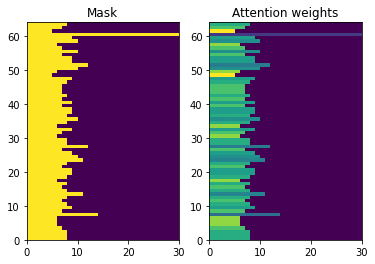

In [114]:
units = RNN_UNITS
attention = CrossAttention(units)
embedding_src = L.Embedding(vectorizer_src.vocabulary_size(), output_dim=units, mask_zero=True)
embedding_dst = L.Embedding(vectorizer_dst.vocabulary_size(), output_dim=units, mask_zero=True)

print(f"{dst_in_enc_sample.shape=}")

enc_hidden = embedding_src(src_enc_sample)
target = embedding_dst(dst_in_enc_sample)
attention_values, weights = attention(target, enc_hidden, enc_hidden)


print(f"{enc_hidden.shape=}, (batch, s, units)")

print(f"{target.shape=}, (batch, t, units)")
print(f"{attention_values.shape=}, (batch, t, units)")

print(f"{weights.shape=}, (batch, t, s)")

mask = (src_enc_sample != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask)
plt.title('Mask');

plt.subplot(1, 2, 2)
plt.pcolormesh(mask * weights[:, 0, :])
plt.title('Attention weights')

### Decoder

In [115]:
class Decoder(M.Model):
    
    @classmethod
    def add_method(cls, fun):
        setattr(cls, fun.__name__, fun)
        return fun
    
    def __init__(self, vectorizer: L.TextVectorization, units: int):
        super(Decoder, self).__init__()
        self.vectorizer = vectorizer
        self.vocab_size = self.vectorizer.vocabulary_size()
        
        self.word_to_id = L.StringLookup(
            vocabulary=vectorizer.get_vocabulary(),
            mask_token='',
            oov_token='[UNK]'
        )
        self.id_to_word = L.StringLookup(
            vocabulary=vectorizer.get_vocabulary(),
            mask_token='',
            oov_token='[UNK]',
            invert=True
        )
        self.start_token = self.word_to_id('[START]')
        self.end_token = self.word_to_id('[END]')
        self.units = units 
        
        # Layers
        self.embedding = L.Embedding(
            input_dim=self.vocab_size,
            output_dim=self.units,
            mask_zero=True
        )
        self.rnn = L.GRU(
            units=self.units,
            return_sequences=True,
            return_state=True,
            recurrent_initializer="glorot_uniform",
            dropout=0.2,
            recurrent_dropout=0.2,
        )
        
        self.attention = CrossAttention(self.units)
        
        self.output_layer = L.Dense(self.vocab_size)
        
        self.last_attention_weights = None
    
    def call(self, x, context, state=None, return_state=False):
        shape_checker = ShapeChecker()
        shape_checker(x, 'batch t')
        shape_checker(context, 'batch s units')
        # 1. Lookup the embeddings
        x = self.embedding(x)
        shape_checker(x, 'batch t units')
        # 2. Process the target sequence.
        x, state = self.rnn(x, initial_state=state)
        shape_checker(x, 'batch t units')
        # 3. Use the RNN output as the query for the attention over the context.
        x, weights = self.attention(x, context, context)
        self.last_attention_weights = weights
        shape_checker(x, 'batch t units')
        shape_checker(self.last_attention_weights, 'batch t s')
        # Step 4. Generate logit predictions for the next token.
        logits = self.output_layer(x)
        shape_checker(logits, 'batch t target_vocab_size')
        if return_state:
            return logits, state
        else:
            return logits

In [116]:
decoder = Decoder(vectorizer_dst, RNN_UNITS)

enc_hidden = embedding_src(src_enc_sample)


logits = decoder(x=dst_in_enc_sample, context=enc_hidden)

print(f'{enc_hidden.shape=}: (batch, s, units)')
print(f'{dst_in_enc_sample.shape=}: (batch, t) ')
print(f'{logits.shape=}: (batch, t, target_vocabulary_size) ')

enc_hidden.shape=TensorShape([64, 30, 128]): (batch, s, units)
dst_in_enc_sample.shape=TensorShape([64, 30]): (batch, t) 
logits.shape=TensorShape([64, 30, 13238]): (batch, t, target_vocabulary_size) 


In [117]:
@Decoder.add_method
def get_initial_state(self, context):
    batch_size = tf.shape(context)[0]
    start_tokens = tf.fill([batch_size, 1], self.start_token)
    done = tf.zeros([batch_size, 1], dtype=tf.bool)
    embedded = self.embedding(start_tokens)
    return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

In [118]:
@Decoder.add_method
def tokens_to_text(self, tokens):
    words = self.id_to_word(tokens)
    result = tf.strings.reduce_join(words, axis=-1, separator=' ')
    result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
    result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
    return result

In [119]:
@Decoder.add_method
def get_next_token(self, x, context, done, state, temperature = 0.0):
    logits, state = self(
        x=x,
        context=context,
        state=state,
        return_state=True,
    ) 

    if temperature == 0.0:
        next_token = tf.argmax(logits, axis=-1)
    else:
        logits = logits[:, -1, :]/temperature
        next_token = tf.random.categorical(logits, num_samples=1)

    # If a sequence produces an `end_token`, set it `done`
    done = done | (next_token == self.end_token)
    # Once a sequence is done it only produces 0-padding.
    next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)

    return next_token, done, state

In [120]:
# Setup the loop variables.
start_tokens, done, state = decoder.get_initial_state(enc_hidden)
tokens = []

for n in range(10):
    # Run one step.
    next_token, done, state = decoder.get_next_token(
        x=start_tokens, 
        context=enc_hidden, 
        done=done, 
        state=state, 
        temperature=1.0
    )
    # Add the token to the output.
    tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
result[:3].numpy()

array([b'lifting twentyfive uncanny camels let filthy rattlesnake rosetta delegates lefthanded',
       b'conquered reserve planted sprained advantage faking sitting sinister tour hall',
       b'knowing cancer hops tuition volumes andrew earths holiday benches lends'],
      dtype=object)

### Translator

In [121]:
class Translator(tf.keras.Model):
    @classmethod
    def add_method(cls, fun):
        setattr(cls, fun.__name__, fun)
        return fun

    def __init__(self, units, context_text_processor, target_text_processor):
        super().__init__()
        # Build the encoder and decoder
        encoder = Encoder(context_text_processor, units)
        decoder = Decoder(target_text_processor, units)

        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        context, x = inputs
        context = self.encoder(context)
        logits = self.decoder(context=context, x=x)

        #TODO(b/250038731): remove this
        try:
            # Delete the keras mask, so keras doesn't scale the loss+accuracy. 
            del logits._keras_mask
        except AttributeError:
            pass

        return logits

In [123]:
model = Translator(RNN_UNITS, vectorizer_src, vectorizer_dst)

logits = model((src_enc_sample, dst_in_enc_sample))

print(f'Context tokens, shape: (batch, s, units) {src_enc_sample.shape}')
print(f'Target tokens, shape: (batch, t) {dst_in_enc_sample.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (64, 30)
Target tokens, shape: (batch, t) (64, 30)
logits, shape: (batch, t, target_vocabulary_size) (64, 30, 13238)


## Train

In [124]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [125]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)

    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)

    return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [126]:
model.compile(optimizer='adam',
              loss=masked_loss, 
              metrics=[masked_acc, masked_loss])

In [128]:
vocab_size = 1.0 * vectorizer_dst.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}

{'expected_loss': 9.490847, 'expected_acc': 7.554011179936546e-05}

In [130]:
model.evaluate(ds_val, steps=20, return_dict=True)

20/20 [==============================] - 5s 140ms/step - loss: 9.4948 - masked_acc: 2.0223e-04 - masked_loss: 9.4948


{'loss': 9.49478816986084,
 'masked_acc': 0.00020222962484695017,
 'masked_loss': 9.49478816986084}

In [133]:
history = model.fit(
    ds_train.repeat(), 
    epochs=100,
    steps_per_epoch = 100,
    validation_data=ds_val,
    validation_steps = 20,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

Epoch 1/100
100/100 [==============================] - 53s 442ms/step - loss: 5.7887 - masked_acc: 0.1861 - masked_loss: 5.7887 - val_loss: 4.6319 - val_masked_acc: 0.2863 - val_masked_loss: 4.6319
Epoch 2/100
100/100 [==============================] - 46s 457ms/step - loss: 4.2565 - masked_acc: 0.3465 - masked_loss: 4.2565 - val_loss: 3.9409 - val_masked_acc: 0.3824 - val_masked_loss: 3.9409
Epoch 3/100
100/100 [==============================] - 40s 403ms/step - loss: 3.6827 - masked_acc: 0.4082 - masked_loss: 3.6827 - val_loss: 3.4003 - val_masked_acc: 0.4509 - val_masked_loss: 3.4003
Epoch 4/100
100/100 [==============================] - 43s 427ms/step - loss: 3.2523 - masked_acc: 0.4637 - masked_loss: 3.2523 - val_loss: 3.0300 - val_masked_acc: 0.4982 - val_masked_loss: 3.0300
Epoch 5/100
100/100 [==============================] - 41s 409ms/step - loss: 2.9467 - masked_acc: 0.5180 - masked_loss: 2.9467 - val_loss: 2.7868 - val_masked_acc: 0.5447 - val_masked_loss: 2.7868
Epoch 6/10

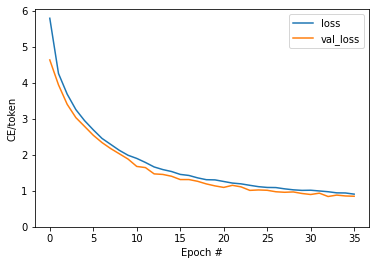

In [134]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

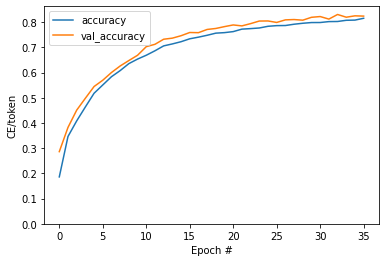

In [135]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

## Translate

In [139]:
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
    # Process the input texts
    context = self.encoder.convert_input(texts)
    batch_size = tf.shape(texts)[0]

    # Setup the loop inputs
    tokens = []
    attention_weights = []
    next_token, done, state = self.decoder.get_initial_state(context)

    for _ in range(max_length):
        # Generate the next token
        next_token, done, state = self.decoder.get_next_token(
            next_token, context, done,  state, temperature)

        # Collect the generated tokens
        tokens.append(next_token)
        attention_weights.append(self.decoder.last_attention_weights)

        if tf.executing_eagerly() and tf.reduce_all(done):
            break

    # Stack the lists of tokens and attention weights.
    tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
    self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

    result = self.decoder.tokens_to_text(tokens)
    return result

In [156]:
phrase_ita = """
subito dopo il risveglio mi faccio una doccia
"""

In [157]:
result = model.translate([phrase_ita])
result[0].numpy().decode()

'have you been out by home ? '

## Plot attention

In [158]:
@Translator.add_method
def plot_attention(self, text, **kwargs):
    assert isinstance(text, str)
    output = self.translate([text], **kwargs)
    output = output[0].numpy().decode()

    attention = self.last_attention_weights[0]

    context = clean_string(text)
    context = context.numpy().decode().split()

    output = clean_string(output)
    output = output.numpy().decode().split()[1:]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)

    ax.matshow(attention, cmap='viridis', vmin=0.0)

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + output, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    ax.set_xlabel('Input text')
    ax.set_ylabel('Output text')

/tmp/ipykernel_16982/159585980.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
/tmp/ipykernel_16982/159585980.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + output, fontdict=fontdict)


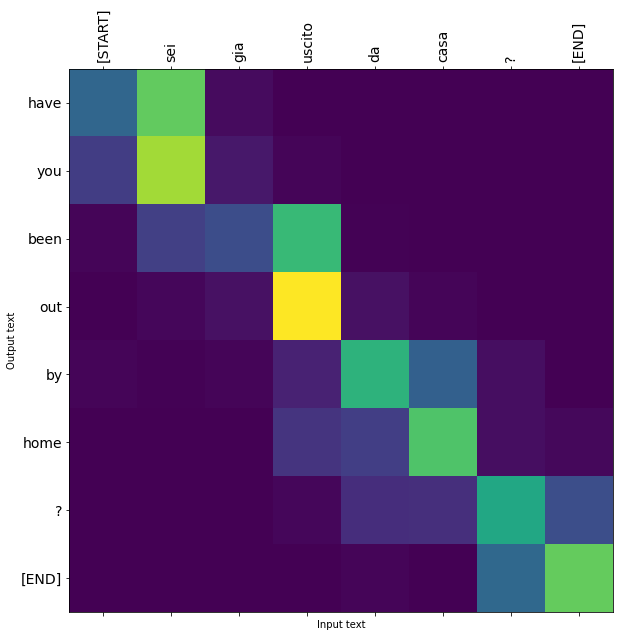

In [159]:
model.plot_attention(phrase_ita) # Are you still home